In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
pd.isnull(df)
print (np.sum(pd.isnull(df)))

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [4]:
df = df.dropna()

In [5]:
df['Summary'].loc[df['Summary'] == 'Partly Cloudy'] = 1
df['Summary'].loc[df['Summary'] == 'Mostly Cloudy'] = 1
df['Summary'].loc[df['Summary'] != 1] = -1
print(df.groupby('Summary')['Summary'].count())

Summary
-1    36387
 1    59549
Name: Summary, dtype: int64


e:\python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
e:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
e:\python\lib\site-packages\ipykernel_launcher

In [6]:
print(df.groupby('Precip Type')['Precip Type'].count())

Precip Type
rain    85224
snow    10712
Name: Precip Type, dtype: int64


In [7]:
df['Precip Type'].loc[df['Precip Type'] == 'rain'] = 1
df['Precip Type'].loc[df['Precip Type'] == 'snow'] = 2
print(df.groupby('Precip Type')['Precip Type'].count())

Precip Type
1    85224
2    10712
Name: Precip Type, dtype: int64


e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
e:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
print(df.groupby('Daily Summary')['Daily Summary'].count())

Daily Summary
Breezy and foggy starting in the evening.            24
Breezy and foggy until morning.                      24
Breezy and mostly cloudy overnight.                  24
Breezy and partly cloudy in the afternoon.           24
Breezy in the morning and foggy in the evening.      24
                                                   ... 
Partly cloudy until night.                         6169
Rain throughout the day.                             24
Rain until afternoon.                                17
Rain until morning.                                  12
Windy in the afternoon.                              24
Name: Daily Summary, Length: 214, dtype: int64


In [9]:
print(df.groupby('Loud Cover')['Loud Cover'].count())

Loud Cover
0.0    95936
Name: Loud Cover, dtype: int64


In [10]:
df = df.drop(columns = ["Formatted Date"])
df = df.drop(columns = ["Daily Summary"])
df = df.drop(columns = ["Loud Cover"])

In [11]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,1,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,1,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,1,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,1,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,1,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,1,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [12]:
X = df.drop(columns = ["Summary"])
y = df["Summary"]
print (X)
print (y)

      Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
0               1         9.472222                  7.388889      0.89   
1               1         9.355556                  7.227778      0.86   
2               1         9.377778                  9.377778      0.89   
3               1         8.288889                  5.944444      0.83   
4               1         8.755556                  6.977778      0.83   
...           ...              ...                       ...       ...   
96448           1        26.016667                 26.016667      0.43   
96449           1        24.583333                 24.583333      0.48   
96450           1        22.038889                 22.038889      0.56   
96451           1        21.522222                 21.522222      0.60   
96452           1        20.438889                 20.438889      0.61   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0                14.1197                  

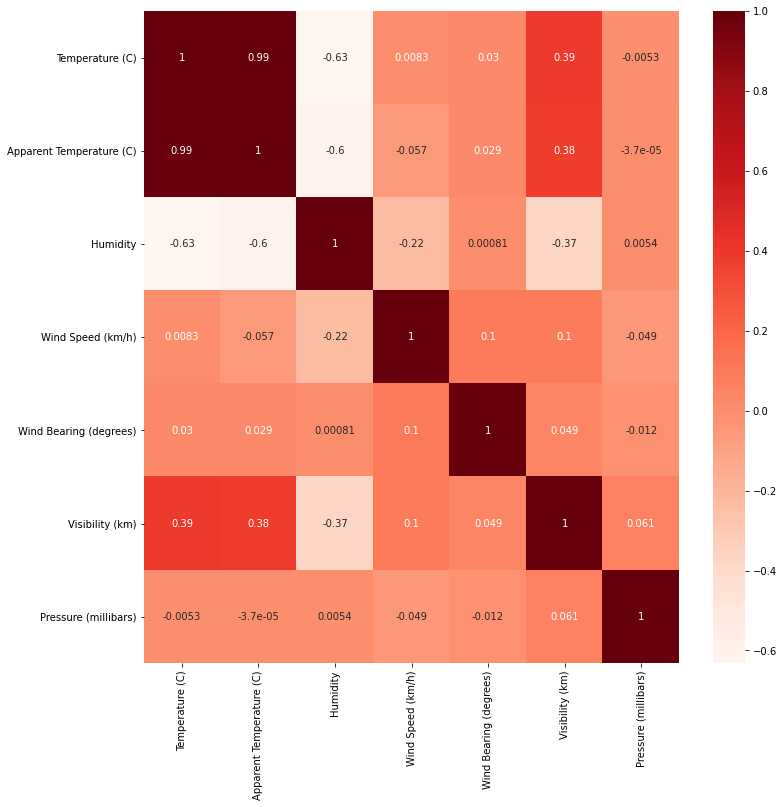

In [13]:
cor = X.corr()

plt.figure(figsize = (12,12))
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [14]:
X = X.drop(columns = ["Apparent Temperature (C)"])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X

array([[0.        , 0.50697507, 0.89      , ..., 0.69916435, 0.983     ,
        0.97013513],
       [0.        , 0.50508505, 0.86      , ..., 0.72144847, 0.983     ,
        0.97061297],
       [0.        , 0.50544505, 0.89      , ..., 0.56824513, 0.929     ,
        0.97090923],
       ...,
       [0.        , 0.71055711, 0.56      , ..., 0.08356546, 1.        ,
        0.97064164],
       [0.        , 0.70218702, 0.6       , ..., 0.05571031, 1.        ,
        0.97091879],
       [0.        , 0.68463685, 0.61      , ..., 0.1086351 , 0.964     ,
        0.97111948]])

In [16]:
n = len(X)
X_train = np.asarray(X)[:int(0.7*n),:]
y_train = np.asarray(y)[:int(0.7*n)]
X_train.shape

(67155, 7)

In [17]:
X_test = np.asarray(X)[int(0.7*n):,:]
y_test = np.asarray(y)[int(0.7*n):]
X_test.shape

(28781, 7)

# linear classifier

In [18]:
w = np.linalg.inv(X_train.transpose()@X_train)@X_train.transpose()@y_train
y_hat = np.sign(X_train@w)

In [19]:
error_rate = np.sum(y_hat != y_train)/y_train.shape
accuracy = 1 - error_rate
accuracy

array([0.72343087])

# SVD 

In [20]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)
print('U = ',U.round(3), sep="\n", end='\n\n')
print('Singular Values = ',s.round(3), sep="\n", end='\n\n')
print('V^T = ',VT.round(3), sep="\n", end='\n\n')

U = 
[[-0.004  0.002  0.001 ...  0.007 -0.001  0.   ]
 [-0.004  0.002  0.001 ...  0.007 -0.001 -0.   ]
 [-0.004  0.001 -0.001 ...  0.006  0.003 -0.002]
 ...
 [-0.005  0.002  0.002 ...  0.005 -0.001  0.004]
 [-0.005  0.001  0.003 ...  0.003  0.     0.003]
 [-0.005  0.001  0.003 ...  0.004  0.002  0.002]]

Singular Values = 
[408.32   98.806  73.618  57.139  44.136  29.156  25.186]

V^T = 
[[-0.081 -0.344 -0.463 -0.108 -0.347 -0.399 -0.608]
 [-0.842  0.287 -0.298  0.031  0.027  0.337 -0.066]
 [-0.022 -0.119 -0.143  0.015  0.935 -0.201 -0.225]
 [ 0.503  0.121 -0.616  0.074  0.037  0.582 -0.083]
 [-0.075 -0.543  0.435 -0.064  0.026  0.586 -0.402]
 [ 0.099  0.413  0.13  -0.861  0.039  0.039 -0.24 ]
 [ 0.125  0.552  0.302  0.485 -0.041 -0.047 -0.591]]



In [21]:
# # svd rank-1 approximation
# T = U[:,0]
# print('Taste for rank-1 = ', T.round(3), sep="\n", end='\n\n')

# W = s[0]*VT[0,:]
# print('Weights for rank-1 = ',W.round(3), sep="\n", end='\n\n')

# X_1 = s[0]*U[:,[0]]@VT[[0],:]
# print("Rank-1 Approximation = ",X_1.round(3), sep="\n", end='\n\n')

In [22]:
# # svd rank-2 approximation
# T = U[:,1] 
# print('Taste for rank-2 = ', T.round(3), sep="\n", end='\n\n')

# W = np.vstack((s[0]*VT[0,:],s[1]*VT[1,:]))
# print('Weights for rank-2 = ', W.round(3), sep="\n", end='\n\n')

# X_2 = s[0]*U[:,[1]]@VT[[0],:]

# print('Rank-2 Approximation = ',X_2.round(3), sep="\n", end='\n\n')

In [23]:
r = 6
w_svd = VT[:r,:].T @ np.diag(1/s[:r]) @ U[:,:r].T @ y_train
y_hat_svd = np.sign(X_train@w_svd)

In [24]:
error_rate = np.sum(y_hat_svd != y_train)/y_train.shape
accuracy = 1 - error_rate
accuracy

array([0.71610453])

# regularization

In [25]:
Lambda = np.logspace(-10,10,num = 50,base = 2)
Lambda

array([9.76562500e-04, 1.29589385e-03, 1.71964506e-03, 2.28196091e-03,
       3.02815142e-03, 4.01834271e-03, 5.33232190e-03, 7.07596613e-03,
       9.38977382e-03, 1.24601858e-02, 1.65346080e-02, 2.19413472e-02,
       2.91160647e-02, 3.86368811e-02, 5.12709598e-02, 6.80363228e-02,
       9.02838809e-02, 1.19806286e-01, 1.58982379e-01, 2.10968870e-01,
       2.79954700e-01, 3.71498572e-01, 4.92976861e-01, 6.54177979e-01,
       8.68091107e-01, 1.15195282e+00, 1.52863599e+00, 2.02849277e+00,
       2.69180039e+00, 3.57200647e+00, 4.74003581e+00, 6.29000526e+00,
       8.34680745e+00, 1.10761743e+01, 1.46980313e+01, 1.95042185e+01,
       2.58820063e+01, 3.43453008e+01, 4.55760529e+01, 6.04792082e+01,
       8.02556253e+01, 1.06498838e+02, 1.41323458e+02, 1.87535565e+02,
       2.48858814e+02, 3.30234477e+02, 4.38219601e+02, 5.81515352e+02,
       7.71668141e+02, 1.02400000e+03])

In [26]:
for lam in Lambda:
    w = np.linalg.inv(X_train.transpose()@X_train+lam*np.eye(X_train.shape[1]))@X_train.transpose()@y_train
    y_hat = np.sign(X_train@w)
    error_rate = np.sum(y_hat != y_train)/y_train.shape
    accuracy = 1 - error_rate
    print ("lambda =", lam, ", accuracy =", accuracy)

lambda = 0.0009765625 , accuracy = [0.72343087]
lambda = 0.0012958938515892147 , accuracy = [0.72343087]
lambda = 0.0017196450555768113 , accuracy = [0.72343087]
lambda = 0.002281960913344293 , accuracy = [0.72343087]
lambda = 0.003028151415981853 , accuracy = [0.72343087]
lambda = 0.004018342708891707 , accuracy = [0.72343087]
lambda = 0.005332321904671864 , accuracy = [0.72343087]
lambda = 0.007075966127061773 , accuracy = [0.72343087]
lambda = 0.00938977382206761 , accuracy = [0.72343087]
lambda = 0.012460185767762717 , accuracy = [0.72343087]
lambda = 0.01653460800112963 , accuracy = [0.72343087]
lambda = 0.021941347171432177 , accuracy = [0.72343087]
lambda = 0.02911606466052441 , accuracy = [0.72344576]
lambda = 0.03863688107627274 , accuracy = [0.72344576]
lambda = 0.05127095975047737 , accuracy = [0.72344576]
lambda = 0.06803632282185909 , accuracy = [0.72344576]
lambda = 0.09028388088789624 , accuracy = [0.72344576]
lambda = 0.11980628596760347 , accuracy = [0.72344576]
lambda

# SVD For Regularization

In [27]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

In [28]:
Lambda = np.logspace(-10,10,num = 50,base = 2)
Lambda

array([9.76562500e-04, 1.29589385e-03, 1.71964506e-03, 2.28196091e-03,
       3.02815142e-03, 4.01834271e-03, 5.33232190e-03, 7.07596613e-03,
       9.38977382e-03, 1.24601858e-02, 1.65346080e-02, 2.19413472e-02,
       2.91160647e-02, 3.86368811e-02, 5.12709598e-02, 6.80363228e-02,
       9.02838809e-02, 1.19806286e-01, 1.58982379e-01, 2.10968870e-01,
       2.79954700e-01, 3.71498572e-01, 4.92976861e-01, 6.54177979e-01,
       8.68091107e-01, 1.15195282e+00, 1.52863599e+00, 2.02849277e+00,
       2.69180039e+00, 3.57200647e+00, 4.74003581e+00, 6.29000526e+00,
       8.34680745e+00, 1.10761743e+01, 1.46980313e+01, 1.95042185e+01,
       2.58820063e+01, 3.43453008e+01, 4.55760529e+01, 6.04792082e+01,
       8.02556253e+01, 1.06498838e+02, 1.41323458e+02, 1.87535565e+02,
       2.48858814e+02, 3.30234477e+02, 4.38219601e+02, 5.81515352e+02,
       7.71668141e+02, 1.02400000e+03])

In [29]:
for lam in Lambda:
    w = VT.T@np.linalg.inv(np.diag(s**2)+lam*np.eye(7))@U.T@y_train
    y_hat = np.sign(X_train@w)
    error_rate = np.sum(y_hat != y_train)/y_train.shape
    accuracy = 1 - error_rate
    print ("lambda =", lam, ", accuracy =", accuracy)

lambda = 0.0009765625 , accuracy = [0.66456705]
lambda = 0.0012958938515892147 , accuracy = [0.66456705]
lambda = 0.0017196450555768113 , accuracy = [0.66456705]
lambda = 0.002281960913344293 , accuracy = [0.66456705]
lambda = 0.003028151415981853 , accuracy = [0.66456705]
lambda = 0.004018342708891707 , accuracy = [0.66456705]
lambda = 0.005332321904671864 , accuracy = [0.66456705]
lambda = 0.007075966127061773 , accuracy = [0.66456705]
lambda = 0.00938977382206761 , accuracy = [0.66456705]
lambda = 0.012460185767762717 , accuracy = [0.66456705]
lambda = 0.01653460800112963 , accuracy = [0.66456705]
lambda = 0.021941347171432177 , accuracy = [0.66456705]
lambda = 0.02911606466052441 , accuracy = [0.66456705]
lambda = 0.03863688107627274 , accuracy = [0.66456705]
lambda = 0.05127095975047737 , accuracy = [0.66456705]
lambda = 0.06803632282185909 , accuracy = [0.66456705]
lambda = 0.09028388088789624 , accuracy = [0.66456705]
lambda = 0.11980628596760347 , accuracy = [0.66456705]
lambda

# residual vs norm

In [30]:
A = X_train
d = y_train
la_array = np.logspace(-6, np.log10(100),50)
n = len(la_array)


In [31]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

In [32]:
Lambda = np.logspace(-10,10,num = 50,base = 2)
Lambda

array([9.76562500e-04, 1.29589385e-03, 1.71964506e-03, 2.28196091e-03,
       3.02815142e-03, 4.01834271e-03, 5.33232190e-03, 7.07596613e-03,
       9.38977382e-03, 1.24601858e-02, 1.65346080e-02, 2.19413472e-02,
       2.91160647e-02, 3.86368811e-02, 5.12709598e-02, 6.80363228e-02,
       9.02838809e-02, 1.19806286e-01, 1.58982379e-01, 2.10968870e-01,
       2.79954700e-01, 3.71498572e-01, 4.92976861e-01, 6.54177979e-01,
       8.68091107e-01, 1.15195282e+00, 1.52863599e+00, 2.02849277e+00,
       2.69180039e+00, 3.57200647e+00, 4.74003581e+00, 6.29000526e+00,
       8.34680745e+00, 1.10761743e+01, 1.46980313e+01, 1.95042185e+01,
       2.58820063e+01, 3.43453008e+01, 4.55760529e+01, 6.04792082e+01,
       8.02556253e+01, 1.06498838e+02, 1.41323458e+02, 1.87535565e+02,
       2.48858814e+02, 3.30234477e+02, 4.38219601e+02, 5.81515352e+02,
       7.71668141e+02, 1.02400000e+03])

In [33]:
def ista_solve_hot(A, d, la_array):
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n, 1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [34]:
# At = X_train
# bt = y_train
# Av = X_test
# bv = y_test
# lam_vals = np.logspace(-10,10,num = 50,base = 2)
# number = lam_vals.shape[0]
# W = ista_solve_hot(At,bt,lam_vals);
# err = []
# res = []
# norm = []
# nonz = []
# errv = []
# resv = []
# for i in range(number):
#     err.append(np.mean(np.sign(At@W[:,i:i+1])!=bt))
#     res.append(np.linalg.norm(At@W[:,i:i+1]-bt)**2)
#     norm.append(np.linalg.norm(W[:,i], 1))
#     nonz.append(np.sum(abs(W[:,i])>1e-8))
#     errv.append(np.mean(np.sign(Av@W[:,i:i+1])!=bv))
#     resv.append(np.linalg.norm(Av@W[:,i:i+1]-bv)**2)

In [35]:
# plt.figure()
# plt.plot(norm, res, 'b.-')
# plt.xlabel('$l_1$-norm');
# plt.ylabel('Squared Error');
# plt.title('Training Data')
# plt.show()
# plt.figure()
# plt.plot(nonz,err, 'b.-')
# plt.xlim([0,150])
# plt.xlabel('Non Zero Elements')
# plt.ylabel('Error Rate')
# plt.show()
# plt.figure()
# plt.plot(norm, resv, 'b.-')
# plt.xlabel('$l_1$-norm');
# plt.ylabel('Squared Error');
# plt.title('Test Data')
# plt.show()
# plt.figure()
# plt.plot(nonz, errv, 'b.-')
# plt.xlim([0,150])
# plt.xlabel('Non Zero Elements')
# plt.ylabel('Error Rate')
# plt.show()

# KNN

In [36]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5363  4852]
 [ 4301 14265]]
              precision    recall  f1-score   support

          -1       0.55      0.53      0.54     10215
           1       0.75      0.77      0.76     18566

    accuracy                           0.68     28781
   macro avg       0.65      0.65      0.65     28781
weighted avg       0.68      0.68      0.68     28781



In [40]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

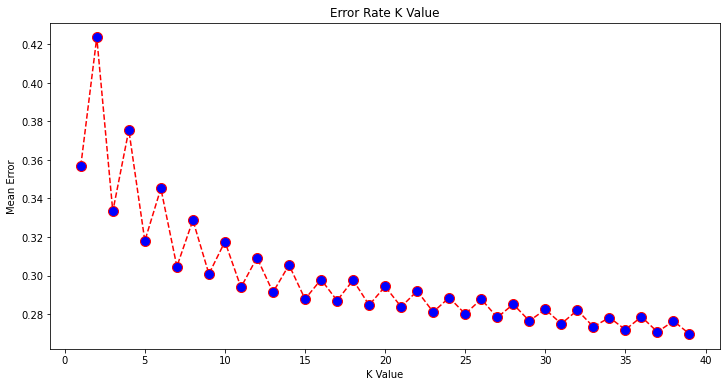

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')